In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

%matplotlib inline

In [2]:
df2 = pd.read_csv('./datasets/cities_clean2.csv')
df2.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl
0,0,"Paradise, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California"
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada"
4,4,"Paradise, CA",1066839617196961792,SSCC is United and moving Forward !!! The powe...,2018-11-25 23:42:40+00:00,#heritageoffaith,LesSimmons,@sscc7710,1,0,https://twitter.com/LesSimmons/status/10668396...,0,SSCC is United and moving Forward !!! The powe...


In [3]:
df2.shape

(1809, 13)

In [4]:
df = pd.read_csv('./datasets/cleanned2.csv')
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations
0,0,"Paradise, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California","Chico, CA"
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA"
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...,"Sacramento, CA"
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada","Reno, NV"
4,4,"Paradise, CA",1066839617196961792,SSCC is United and moving Forward !!! The powe...,2018-11-25 23:42:40+00:00,#heritageoffaith,LesSimmons,@sscc7710,1,0,https://twitter.com/LesSimmons/status/10668396...,0,SSCC is United and moving Forward !!! The powe...,"Sacramento, CA"


In [5]:
df.shape

(1809, 14)

### basic k-means on text
- follow steps in [this](https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52) article

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df2['text_nourl'])

In [7]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [9]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

Cluster 0:
paradise
california
chico
lost
took
day
forget
campfire
away
hoping
Cluster 1:
ca
rd
traffic
closure
sb
nb
camp
89
70
hwy
Cluster 2:
feather
running
fork
extinguishing
extending
extended
express
exposed
exploded
experts


In [10]:
print('')
print('Prediction')
X = vectorizer.transform(['Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball.'])
predicted = model.predict(X)
print(predicted)


Prediction
[0]


In [11]:
len(terms)

3461

### chart k-means

In [12]:
df['key_score'].sort_values(ascending=False)

865     5
1642    5
1146    5
1472    5
1353    5
       ..
956     0
958     0
959     0
960     0
0       0
Name: key_score, Length: 1809, dtype: int64

In [13]:
df.columns

Index(['tweet_count', 'City', 'id', 'tweet_text', 'timestamp', 'hashtags',
       'username', 'mentions', 'rewtweets', 'replies', 'link', 'key_score',
       'text_nourl', 'from_locations'],
      dtype='object')

In [14]:
df['from_locations'].value_counts()

Chico, CA             791
Paradise, CA          576
California, USA       248
Oroville, CA          112
Magalia, CA            17
Durham, CA             12
Gridley, CA            12
South Oroville, CA      9
Sacramento, CA          8
Thermalito, CA          8
Oroville East, CA       3
Folsom, CA              2
nolocationfound         2
Glen Ellen, CA          1
Nevada City, CA         1
Redding, CA             1
Rocklin, CA             1
Florin, CA              1
Yountville, CA          1
Napa, CA                1
Reno, NV                1
Linda, CA               1
Name: from_locations, dtype: int64

In [15]:
df['locs_no'] = df['from_locations']
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations,locs_no
0,0,"Paradise, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California","Chico, CA","Chico, CA"
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA","California, USA"
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...,"Sacramento, CA","Sacramento, CA"
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada","Reno, NV","Reno, NV"
4,4,"Paradise, CA",1066839617196961792,SSCC is United and moving Forward !!! The powe...,2018-11-25 23:42:40+00:00,#heritageoffaith,LesSimmons,@sscc7710,1,0,https://twitter.com/LesSimmons/status/10668396...,0,SSCC is United and moving Forward !!! The powe...,"Sacramento, CA","Sacramento, CA"


In [16]:
df['from_locations'].unique()

array(['Chico, CA', 'California, USA', 'Sacramento, CA', 'Reno, NV',
       'Rocklin, CA', 'Folsom, CA', 'Oroville, CA', 'Florin, CA',
       'Nevada City, CA', 'Yountville, CA', 'Redding, CA', 'Linda, CA',
       'Magalia, CA', 'Paradise, CA', 'nolocationfound', 'Durham, CA',
       'Napa, CA', 'Glen Ellen, CA', 'Oroville East, CA',
       'South Oroville, CA', 'Thermalito, CA', 'Gridley, CA'],
      dtype=object)

In [17]:
all_cities = ['Chico, CA', 'California, USA', 'Sacramento, CA', 'Reno, NV',
       'Rocklin, CA', 'Folsom, CA', 'Oroville, CA', 'Florin, CA',
       'Nevada City, CA', 'Yountville, CA', 'Redding, CA', 'Linda, CA',
       'Magalia, CA', 'Paradise, CA', 'nolocationfound', 'Durham, CA',
       'Napa, CA', 'Glen Ellen, CA', 'Oroville East, CA',
       'South Oroville, CA', 'Thermalito, CA', 'Gridley, CA']

butte_cty = ['Chico, CA',  'Oroville, CA', 'Magalia, CA', 'Paradise, CA',  
             'Durham, CA', 'Oroville East, CA', 'South Oroville, CA', 
             'Thermalito, CA', 'Gridley, CA']

not_butte = ['California, USA', 'Sacramento, CA', 'Reno, NV','Rocklin, CA', 
             'Folsom, CA', 'Florin, CA','Nevada City, CA', 'Yountville, CA', 
             'Redding, CA', 'Linda, CA', 'nolocationfound', 'Napa, CA', 
             'Glen Ellen, CA',]

In [18]:
df['locs_no'] = df['locs_no'].replace(['Chico, CA',  'Oroville, CA', 'Magalia, CA', 'Paradise, CA',  
             'Durham, CA', 'Oroville East, CA', 'South Oroville, CA', 
             'Thermalito, CA', 'Gridley, CA'], 1)

In [19]:
df['locs_no'] = df['locs_no'].replace(['California, USA', 'Sacramento, CA', 'Reno, NV','Rocklin, CA', 
             'Folsom, CA', 'Florin, CA','Nevada City, CA', 'Yountville, CA', 
             'Redding, CA', 'Linda, CA', 'nolocationfound', 'Napa, CA', 
             'Glen Ellen, CA',], 0)

In [20]:
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations,locs_no
0,0,"Paradise, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California","Chico, CA",1
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA",0
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...,"Sacramento, CA",0
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada","Reno, NV",0
4,4,"Paradise, CA",1066839617196961792,SSCC is United and moving Forward !!! The powe...,2018-11-25 23:42:40+00:00,#heritageoffaith,LesSimmons,@sscc7710,1,0,https://twitter.com/LesSimmons/status/10668396...,0,SSCC is United and moving Forward !!! The powe...,"Sacramento, CA",0


In [21]:
df_cluster = df[['key_score', 'locs_no']]

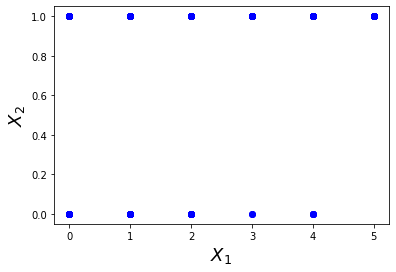

In [22]:
plt.scatter(x=df_cluster['key_score'],
            y=df_cluster['locs_no'],
            c='b');

plt.xlabel("$X_1$", fontsize=18);
plt.ylabel("$X_2$", fontsize=18);

In [23]:
df['timestamp'].sort_values()

816     2018-11-07 00:06:23+00:00
1787    2018-11-07 00:06:23+00:00
1786    2018-11-07 00:07:25+00:00
815     2018-11-07 00:07:25+00:00
1785    2018-11-07 00:08:16+00:00
                  ...            
3       2018-11-25 23:48:52+00:00
2       2018-11-25 23:51:06+00:00
1       2018-11-25 23:54:12+00:00
926     2018-11-25 23:58:04+00:00
0       2018-11-25 23:58:04+00:00
Name: timestamp, Length: 1809, dtype: object

In [24]:
df.sort_values(by='timestamp')

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations,locs_no
816,816,"Paradise, CA",1059960216891080704,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:06:23+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...,0,VOTE do it for the future . . . . . #pmgridcha...,"Paradise, CA",1
1787,861,"Durham, CA",1059960216891080704,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:06:23+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...,0,VOTE do it for the future . . . . . #pmgridcha...,"Paradise, CA",1
1786,860,"Durham, CA",1059960478284374017,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:07:25+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...,0,VOTE do it for the future . . . . . #pmgridcha...,"Paradise, CA",1
815,815,"Paradise, CA",1059960478284374017,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:07:25+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...,0,VOTE do it for the future . . . . . #pmgridcha...,"Paradise, CA",1
1785,859,"Durham, CA",1059960690952286208,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:08:16+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...,0,VOTE do it for the future . . . . . #pmgridcha...,"Paradise, CA",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada","Reno, NV",0
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...,"Sacramento, CA",0
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA",0
926,0,"Durham, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California","Chico, CA",1


In [25]:
cities = pd.read_csv('./datasets/cities_clean.csv')

In [26]:
cities.sort_values(by='timestamp')

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link
816,816,"Paradise, CA",1059960216891080704,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:06:23+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...
1787,861,"Durham, CA",1059960216891080704,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:06:23+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...
1786,860,"Durham, CA",1059960478284374017,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:07:25+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...
815,815,"Paradise, CA",1059960478284374017,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:07:25+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...
1785,859,"Durham, CA",1059960690952286208,VOTE do it for the future . . . . . #pmgridcha...,2018-11-07 00:08:16+00:00,#pmgridchallenge #instatravel #love #wanderlus...,heywoodphotog,NaN,0,0,https://twitter.com/heywoodphotog/status/10599...
...,...,...,...,...,...,...,...,...,...,...,...
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...
926,0,"Durham, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...


In [27]:
cities.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 

In [28]:
cities.shape

(947, 11)

In [29]:
cities.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 
cities.shape

(947, 11)

In [30]:
cities.dtypes

tweet_count     int64
City           object
id              int64
tweet_text     object
timestamp      object
hashtags       object
username       object
mentions       object
rewtweets       int64
replies         int64
link           object
dtype: object

In [31]:
cities['timestamp'] = pd.to_datetime(cities['timestamp'])

In [32]:
cities.dtypes

tweet_count                  int64
City                        object
id                           int64
tweet_text                  object
timestamp      datetime64[ns, UTC]
hashtags                    object
username                    object
mentions                    object
rewtweets                    int64
replies                      int64
link                        object
dtype: object

(array([ 78., 128., 119.,  88.,  89.,  91., 101.,  87.,  90.,  76.]),
 array([737005.00443287, 737006.90385532, 737008.80327778, 737010.70270023,
        737012.60212269, 737014.50154514, 737016.40096759, 737018.30039005,
        737020.1998125 , 737022.09923495, 737023.99865741]),
 <a list of 10 Patch objects>)

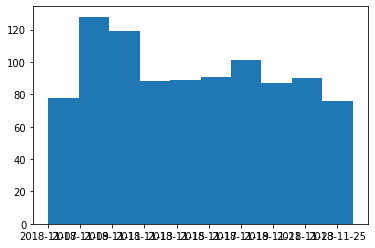

In [33]:
plt.hist(cities['timestamp'])

In [34]:
import datetime

In [37]:
cities.shape

(947, 11)

In [41]:
cities.columns

Index(['tweet_count', 'City', 'id', 'tweet_text', 'timestamp', 'hashtags',
       'username', 'mentions', 'rewtweets', 'replies', 'link'],
      dtype='object')

In [44]:
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations,locs_no
0,0,"Paradise, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California","Chico, CA",1
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA",0
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...,"Sacramento, CA",0
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada","Reno, NV",0
4,4,"Paradise, CA",1066839617196961792,SSCC is United and moving Forward !!! The powe...,2018-11-25 23:42:40+00:00,#heritageoffaith,LesSimmons,@sscc7710,1,0,https://twitter.com/LesSimmons/status/10668396...,0,SSCC is United and moving Forward !!! The powe...,"Sacramento, CA",0


In [46]:
df.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations,locs_no
0,0,"Paradise, CA",1066843491555205120,"Lord Farquad Quad Squat Squad @Chico, Californ...",2018-11-25 23:58:04+00:00,NaN,areoandmilk,NaN,0,0,https://twitter.com/areoandmilk/status/1066843...,0,"Lord Farquad Quad Squat Squad @Chico, California","Chico, CA",1
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA",0
2,2,"Paradise, CA",1066841740060098562,Drinking a Def Leppard Pale by @ElysianBrewing...,2018-11-25 23:51:06+00:00,NaN,geradellsworth,@ElysianBrewing @Golden1Center,0,0,https://twitter.com/geradellsworth/status/1066...,0,Drinking a Def Leppard Pale by @ElysianBrewing...,"Sacramento, CA",0
3,3,"Paradise, CA",1066841178782482433,"The forgotten. #LimeBike #Reno @Reno, Nevada h...",2018-11-25 23:48:52+00:00,#LimeBike #Reno,alittlegordie,NaN,0,0,https://twitter.com/alittlegordie/status/10668...,0,"The forgotten. #LimeBike #Reno @Reno, Nevada","Reno, NV",0
4,4,"Paradise, CA",1066839617196961792,SSCC is United and moving Forward !!! The powe...,2018-11-25 23:42:40+00:00,#heritageoffaith,LesSimmons,@sscc7710,1,0,https://twitter.com/LesSimmons/status/10668396...,0,SSCC is United and moving Forward !!! The powe...,"Sacramento, CA",0


In [47]:
df.shape

(947, 15)

In [38]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px

In [48]:
# Simple line graph of apple high prices
fig = px.line(df, # data
             x = 'timestamp', # date for x-axis
             y = 'key_score' ) # plot close price
fig.show()

In [49]:
df.columns

Index(['tweet_count', 'City', 'id', 'tweet_text', 'timestamp', 'hashtags',
       'username', 'mentions', 'rewtweets', 'replies', 'link', 'key_score',
       'text_nourl', 'from_locations', 'locs_no'],
      dtype='object')

In [50]:
df.from_locations.value_counts()

Chico, CA             397
Paradise, CA          288
California, USA       134
Oroville, CA           56
Magalia, CA            17
Gridley, CA            12
South Oroville, CA      9
Sacramento, CA          8
Durham, CA              6
Thermalito, CA          4
Oroville East, CA       3
nolocationfound         2
Folsom, CA              2
Florin, CA              1
Rocklin, CA             1
Yountville, CA          1
Glen Ellen, CA          1
Redding, CA             1
Nevada City, CA         1
Reno, NV                1
Linda, CA               1
Napa, CA                1
Name: from_locations, dtype: int64

In [52]:
pd.set_option('display.max_rows', 500) #display max rows
df[(df.from_locations == 'California, USA')] 

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,key_score,text_nourl,from_locations,locs_no
1,1,"Paradise, CA",1066842521601400832,winter edition #queenadailypic released. @Soda...,2018-11-25 23:54:12+00:00,#queenadailypic,leenathequeena,NaN,0,0,https://twitter.com/leenathequeena/status/1066...,0,winter edition #queenadailypic released. @Soda...,"California, USA",0
28,28,"Paradise, CA",1066730858403569664,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-25 16:30:30+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
33,33,"Paradise, CA",1066524560273620997,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-25 02:50:44+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
52,52,"Paradise, CA",1066315166780936192,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-24 12:58:41+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
54,54,"Paradise, CA",1066233550452621312,My lottery dream home is my Friday night guilt...,2018-11-24 07:34:22+00:00,#gross,JulissaChavezSF,@hgtv,0,0,https://twitter.com/JulissaChavezSF/status/106...,0,My lottery dream home is my Friday night guilt...,"California, USA",0
63,63,"Paradise, CA",1066142997408956417,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-24 01:34:33+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,1,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
73,73,"Paradise, CA",1066108059393630209,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-23 23:15:43+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
84,84,"Paradise, CA",1065925852708380672,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-23 11:11:41+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
100,100,"Paradise, CA",1065737557777018881,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-22 22:43:28+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
129,129,"Paradise, CA",1065553930854256640,Camp fire closure in #Oroville on Hwy 70 Both ...,2018-11-22 10:33:48+00:00,#Oroville #traffic,TotalTrafficSMF,NaN,0,0,https://twitter.com/TotalTrafficSMF/status/106...,1,Camp fire closure in #Oroville on Hwy 70 Both ...,"California, USA",0
